In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# data from https://www.canada.ca/en/public-health/services/diseases/2019-novel-coronavirus-infection.html
total_data = pd.read_csv('covid19.csv')

total_data.head()

,pruid,prname,prnameFR,date,numconf,numprob,numdeaths,numtotal,numtested,numrecover,...,percentdeath,numtestedtoday,numrecoveredtoday,percentactive,numactive,rateactive,numtotal_last14,ratetotal_last14,numdeaths_last14,ratedeaths_last14
0,35,Ontario,Ontario,31-01-2020,3,0,0.0,3,NaN,NaN,...,0.0,NaN,NaN,100.0,3.0,0.02,NaN,NaN,NaN,NaN
1,59,British Columbia,Colombie-Britannique,31-01-2020,1,0,0.0,1,NaN,NaN,...,0.0,NaN,NaN,100.0,1.0,0.02,NaN,NaN,NaN,NaN
2,1,Canada,Canada,31-01-2020,4,0,0.0,4,NaN,NaN,...,0.0,NaN,NaN,100.0,4.0,0.01,NaN,NaN,NaN,NaN
3,35,Ontario,Ontario,08-02-2020,3,0,0.0,3,NaN,NaN,...,0.0,NaN,NaN,100.0,3.0,0.02,NaN,NaN,NaN,NaN
4,59,British Columbia,Colombie-Britannique,08-02-2020,4,0,0.0,4,NaN,NaN,...,0.0,NaN,NaN,100.0,4.0,0.08,NaN,NaN,NaN,NaN


In [3]:
# extracting data from Ontario
ontario_filter = total_data['prname'] == 'Ontario'
ontario_data1 = total_data.loc[ontario_filter, :]

# extracting confirmed cases and dates
ontario_confirmed_cases = ontario_data1['numtotal'].values
dates1 = ontario_data1['date'].values

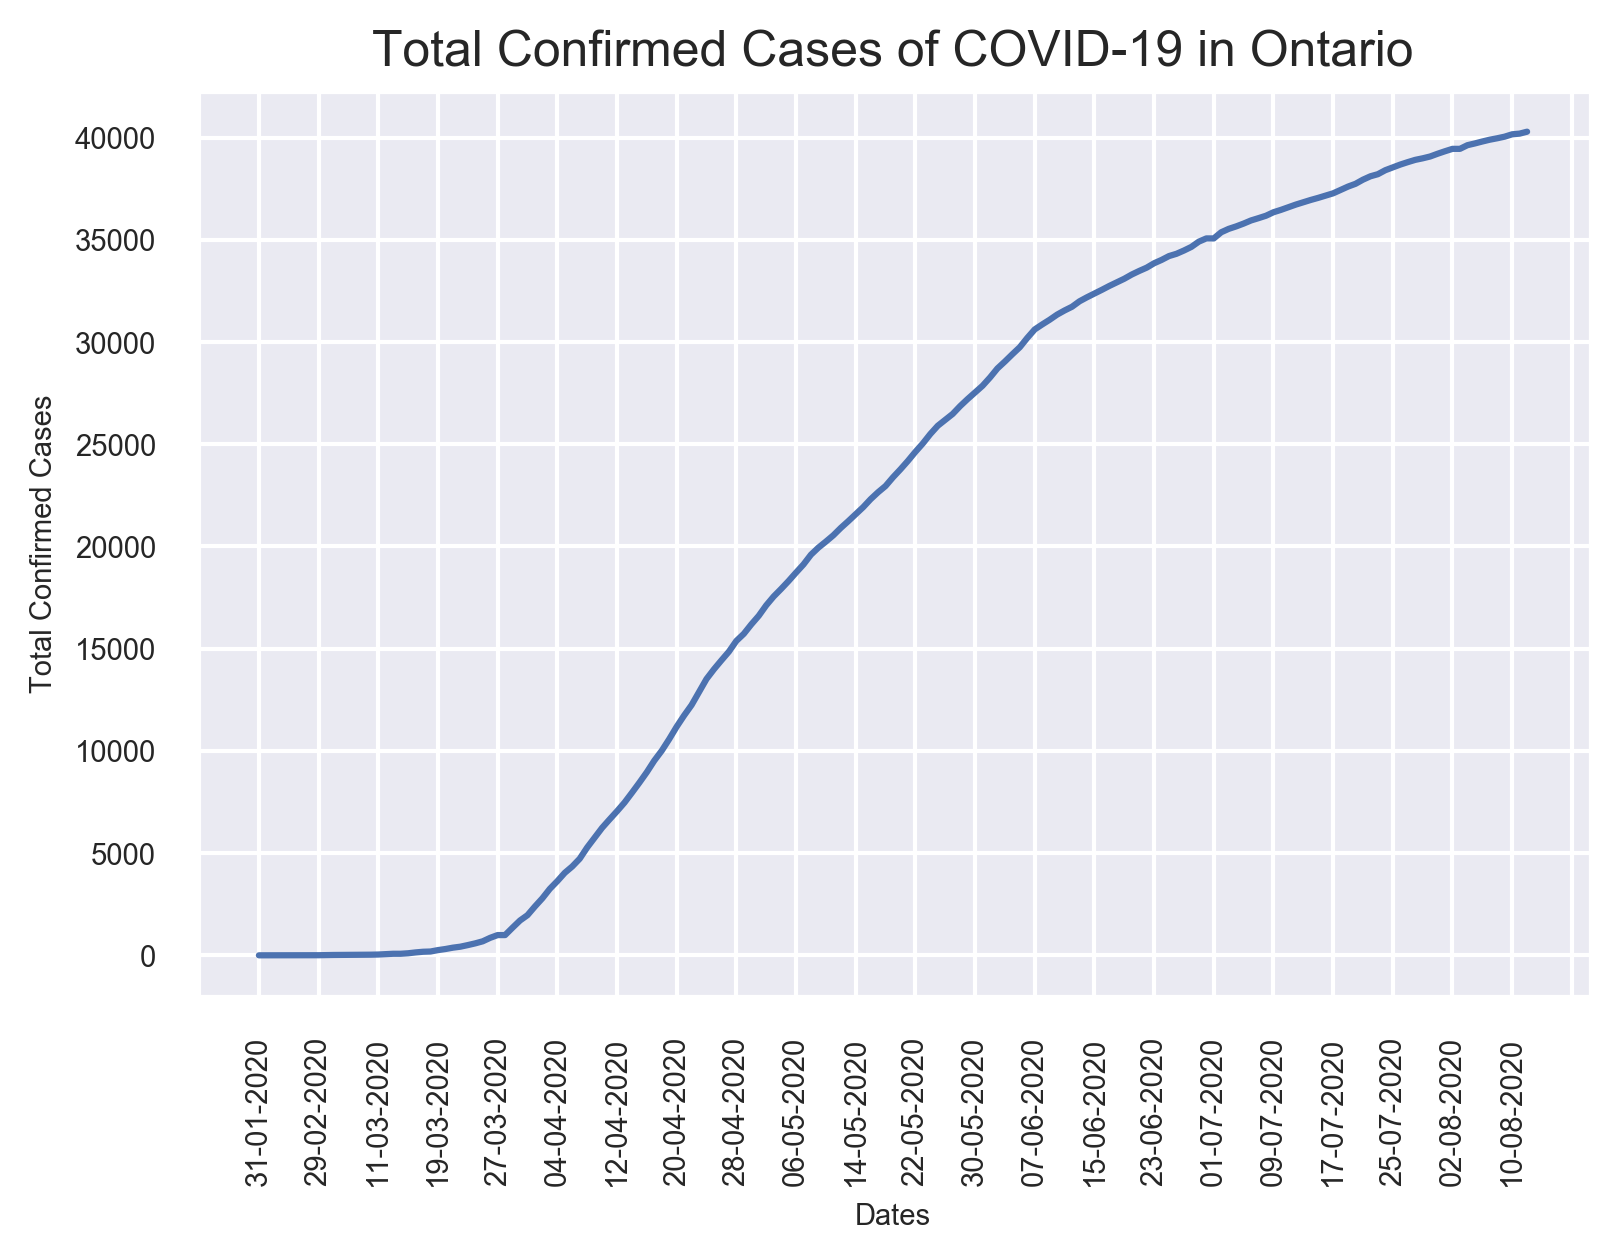

In [4]:
# plotting confirmed cases over time
sns.set()
fig, ax = plt.subplots(dpi=300)

ax.plot(dates1, ontario_confirmed_cases)

ax.set_xlabel('Dates', fontsize = 7)
ax.set_ylabel('Total Confirmed Cases', fontsize = 7)
ax.set_title('Total Confirmed Cases of COVID-19 in Ontario')

ax.tick_params(axis = 'x', labelsize = 7)
ax.tick_params(axis = 'y', labelsize = 7)

# https://kite.com/python/answers/how-to-rotate-axis-labels-in-matplotlib-in-python
plt.xticks(rotation = 90)

# https://jakevdp.github.io/PythonDataScienceHandbook/04.10-customizing-ticks.html
ax.xaxis.set_major_locator(plt.MultipleLocator(8)) 

plt.show()

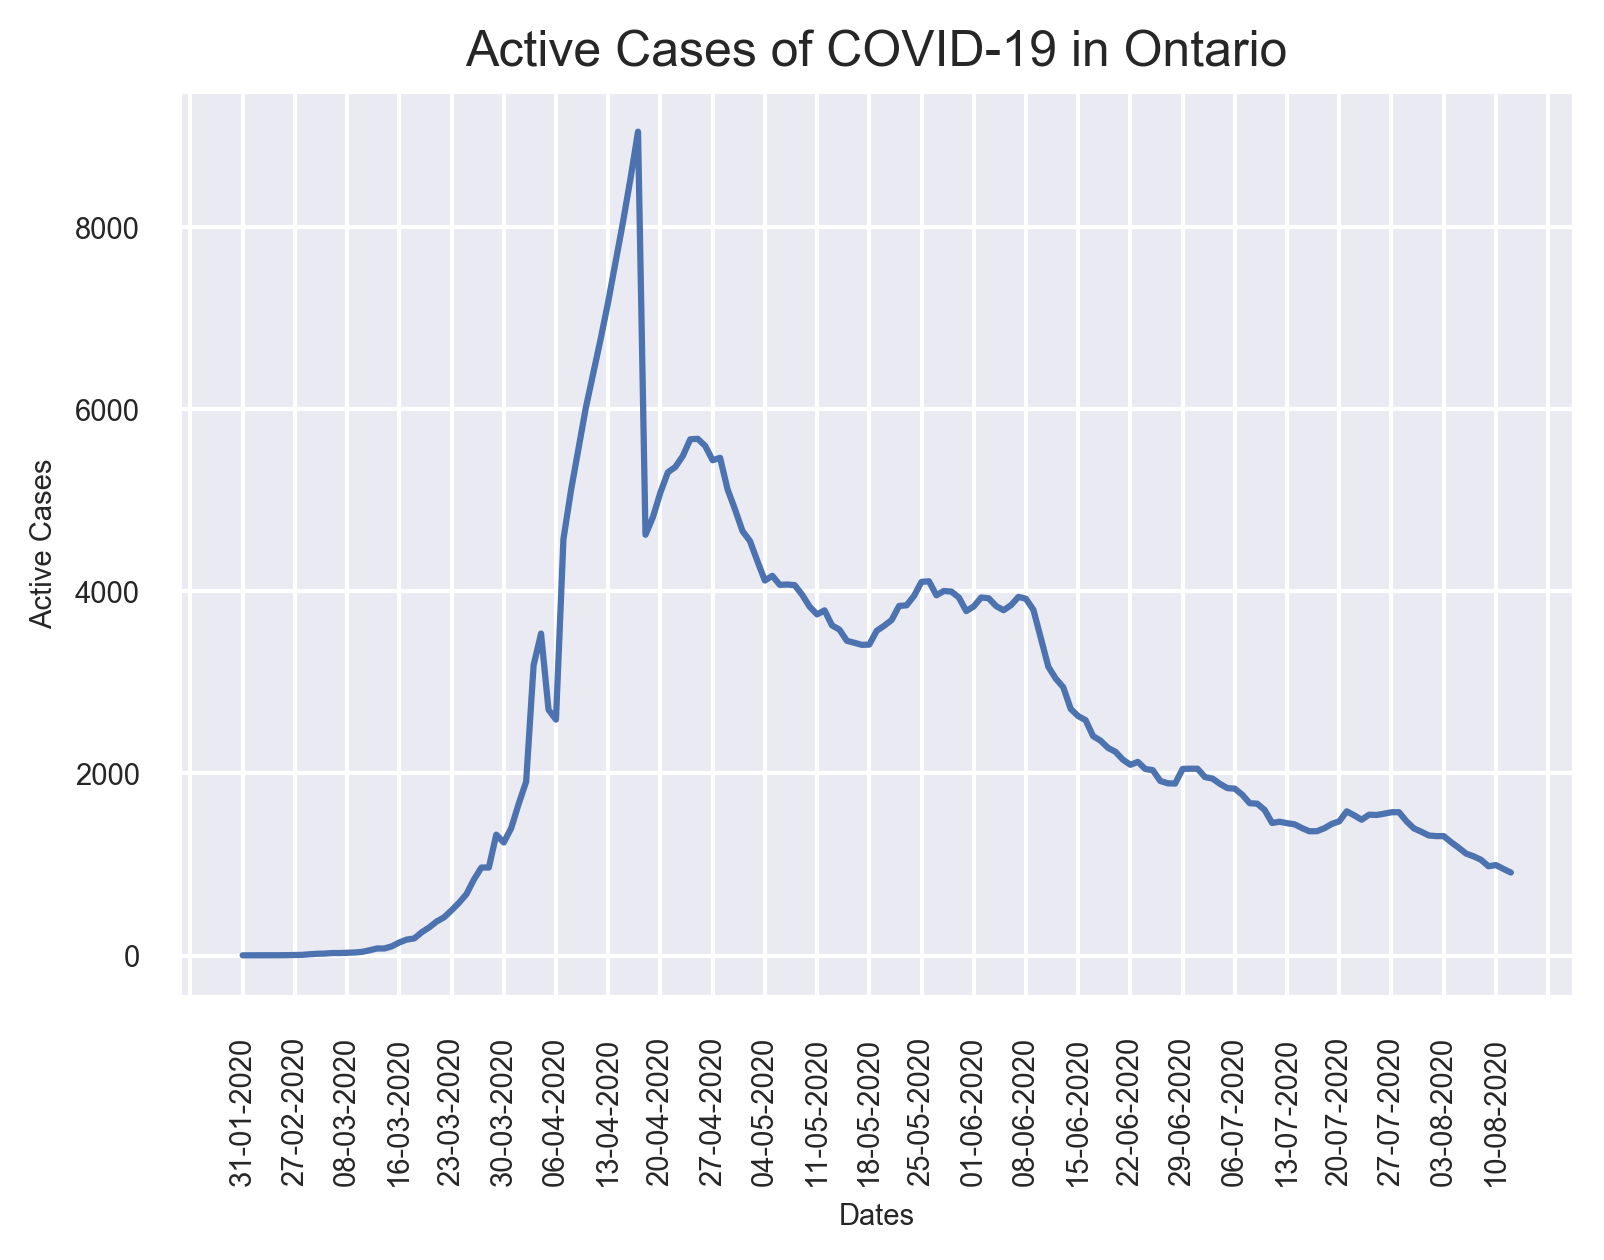

In [5]:
# plotting active cases in Ontario
ontario_active = ontario_data1['numactive'].values

sns.set()
fig, ax = plt.subplots(dpi=300)

ax.plot(dates1, ontario_active)

ax.set_xlabel('Dates', fontsize = 7)
ax.set_ylabel('Active Cases', fontsize = 7)
ax.set_title('Active Cases of COVID-19 in Ontario')

ax.tick_params(axis = 'x', labelsize = 7)
ax.tick_params(axis = 'y', labelsize = 7)

# https://kite.com/python/answers/how-to-rotate-axis-labels-in-matplotlib-in-python
plt.xticks(rotation=90)

# https://jakevdp.github.io/PythonDataScienceHandbook/04.10-customizing-ticks.html
ax.xaxis.set_major_locator(plt.MultipleLocator(7)) 

plt.show()

In [6]:
# extracting number of hospitalized, ICU, ventilated
# data from: https://data.ontario.ca/dataset/status-of-covid-19-cases-in-ontario
ontario_data2 = pd.read_csv('covidtesting.csv')
dates2 = ontario_data2['Reported Date'].values

patients_hospitalized = ontario_data2['Number of patients hospitalized with COVID-19'].values
patients_icu = ontario_data2['Number of patients in ICU with COVID-19'].values
patients_icu_vent = ontario_data2['Number of patients in ICU on a ventilator with COVID-19'].values

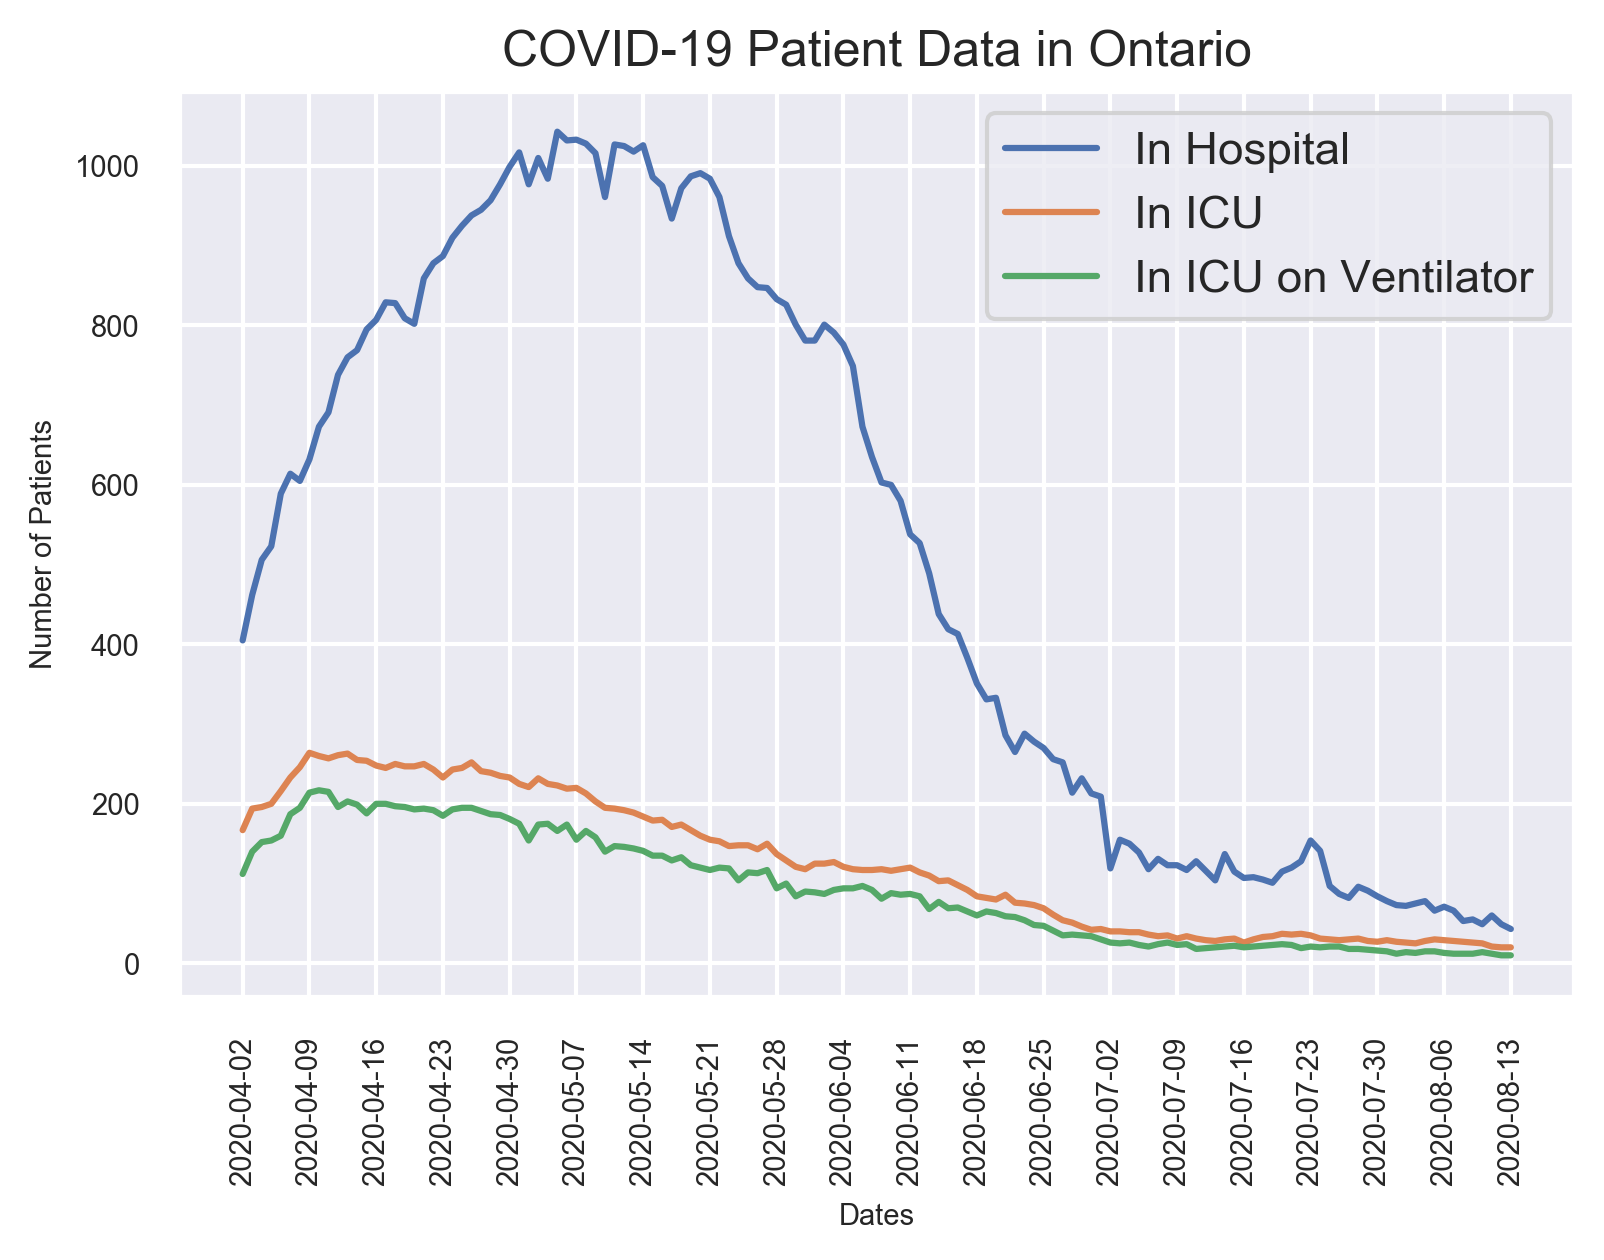

In [7]:
# plotting number of hospitalized, ICU, ventilated
sns.set()
fig, ax = plt.subplots(dpi=300)

ax.plot(dates2, patients_hospitalized, label='In Hospital')
ax.plot(dates2, patients_icu, label='In ICU')
ax.plot(dates2, patients_icu_vent, label='In ICU on Ventilator')

ax.set_xlabel('Dates', fontsize = 7)
ax.set_ylabel('Number of Patients', fontsize = 7)
ax.set_title('COVID-19 Patient Data in Ontario')

ax.tick_params(axis = 'x', labelsize = 7)
ax.tick_params(axis = 'y', labelsize = 7)

plt.xticks(rotation=90)
ax.xaxis.set_major_locator(plt.MultipleLocator(7)) 

plt.legend()
plt.show()

In [8]:
# extracting confirmed cases in all of Canada
canada_filter = total_data['prname'] == 'Canada'
canada_data = total_data.loc[canada_filter, :]

canada_confirmed_cases = canada_data['numtotal'].values

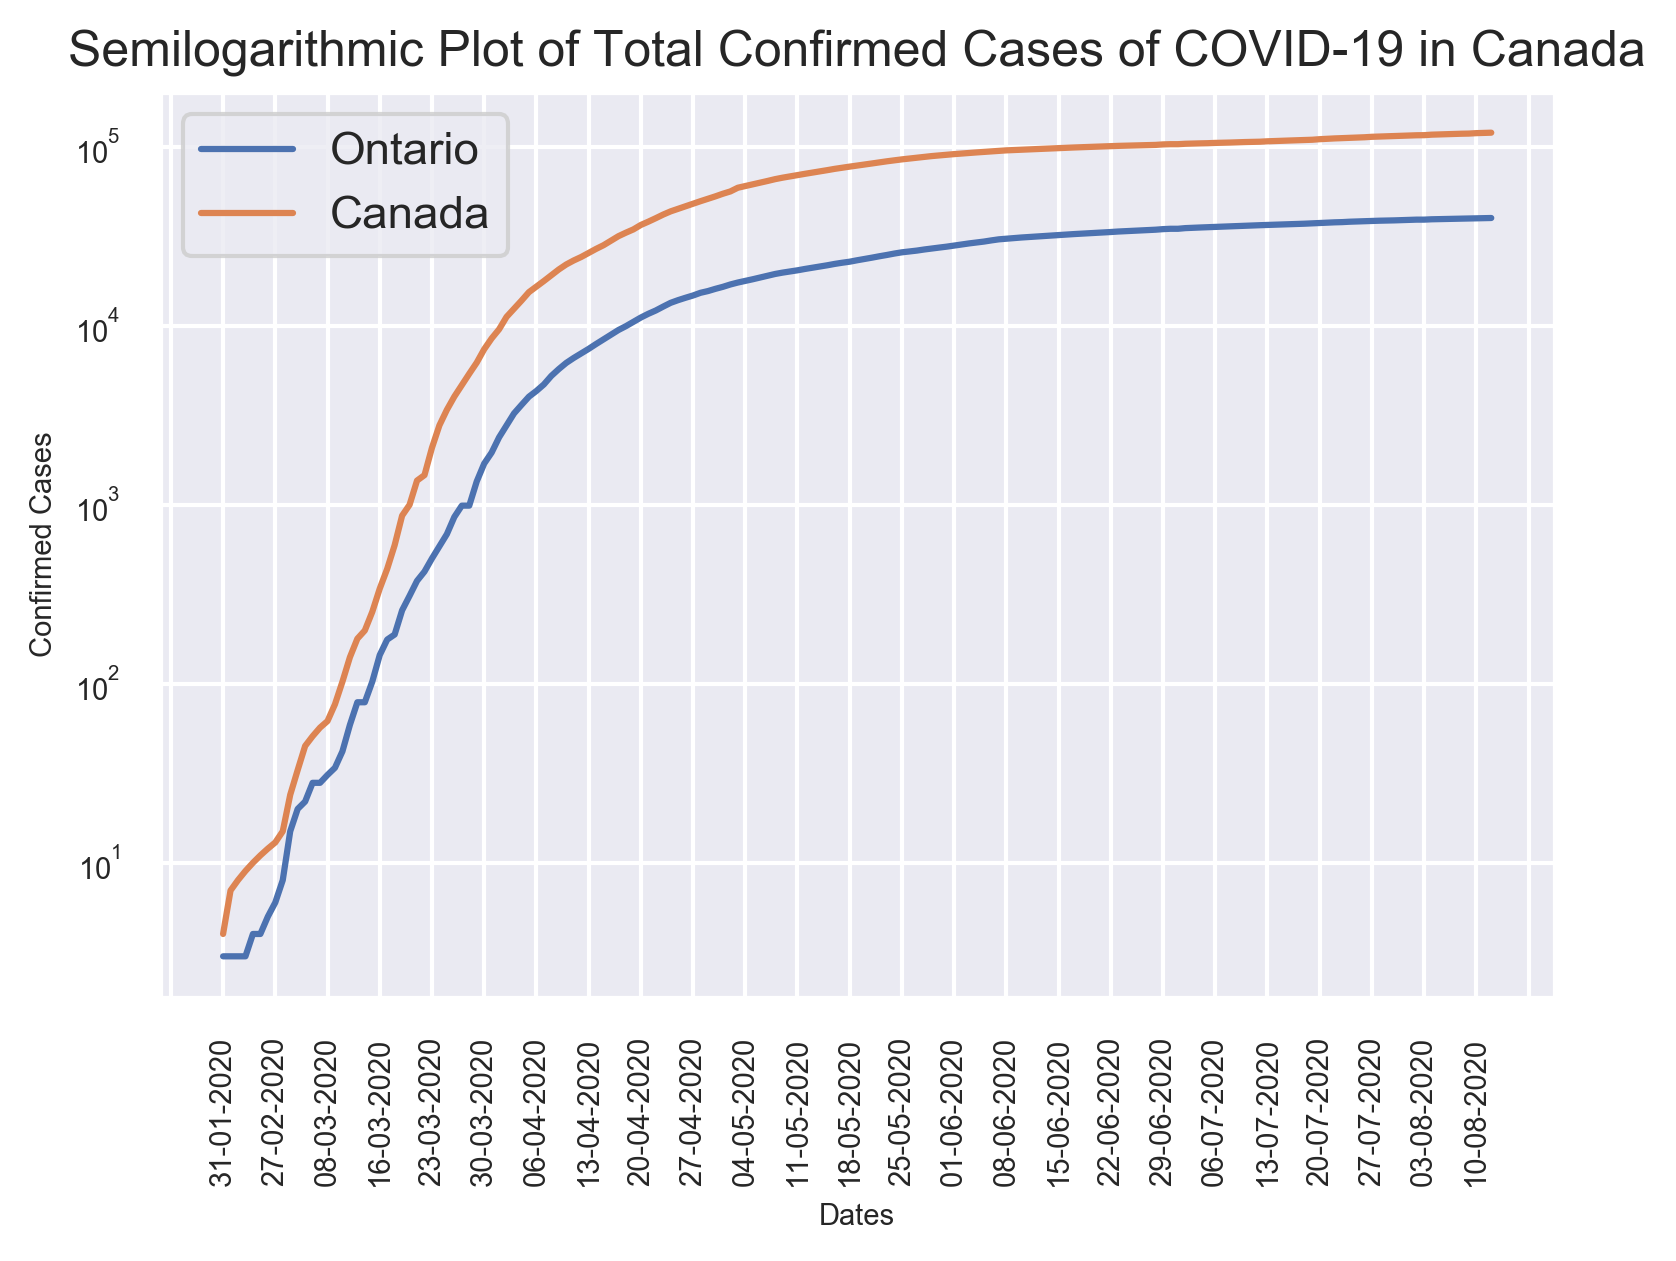

In [9]:
# semilog plot comparing cases in Ontario to Canda
sns.set()
fig, ax = plt.subplots(dpi=300)

ax.semilogy(dates1, ontario_confirmed_cases, label='Ontario')
ax.semilogy(dates1, canada_confirmed_cases, label='Canada')

ax.set_xlabel('Dates', fontsize = 7)
ax.set_ylabel('Confirmed Cases', fontsize = 7)
ax.set_title('Semilogarithmic Plot of Total Confirmed Cases of COVID-19 in Canada')

ax.tick_params(axis = 'x', labelsize = 7)
ax.tick_params(axis = 'y', labelsize = 7)

plt.xticks(rotation=90)
ax.xaxis.set_major_locator(plt.MultipleLocator(7)) 

plt.legend(loc=2)
plt.show()